In [36]:
# Import necessary libraries
%pip install pandas
%pip install matplotlib
%pip install scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Read data from files without headers
puredata =pd.read_csv('data_cleaned_2021.csv')
# All data preprocessing was done using Excel because I had already completed it in the C++ file and saved it in data_encoded.csv.
data = pd.read_csv('data_encoded.csv', header=None)
result = pd.read_csv('Result.csv', header=None)


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
# Print the first few rows of the datasets
print("Data Head:")
print(puredata.head())

print("\nResult Head:")
print(result.head())

Data Head:
   index                  Job Title              Salary Estimate  \
0      0             Data Scientist   $53K-$91K (Glassdoor est.)   
1      1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2      2             Data Scientist   $80K-$90K (Glassdoor est.)   
3      3             Data Scientist   $56K-$97K (Glassdoor est.)   
4      4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\nLocation: Albuquerque, NM\nEdu...     3.8   
1  What You Will Do:\n\nI. General Summary\n\nThe...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\nJob ID: 310709\n\n...     3.8   
4  Data Scientist\nAffinity Solutions / Marketing...     2.9   

                                 Company Name         Location  \
0                      Tecolote Research\n3.8  Albuquerque, NM   
1  University of Maryland Medical System\n3.4    Linthicum, MD 

In [38]:
# Assuming the last column of the data is the target
X = data
y = result.iloc[:, 0]  # Assuming the target is the first column in the result file

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Initialize regression models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=1),
    'Random Forest': RandomForestRegressor(random_state=1)
}



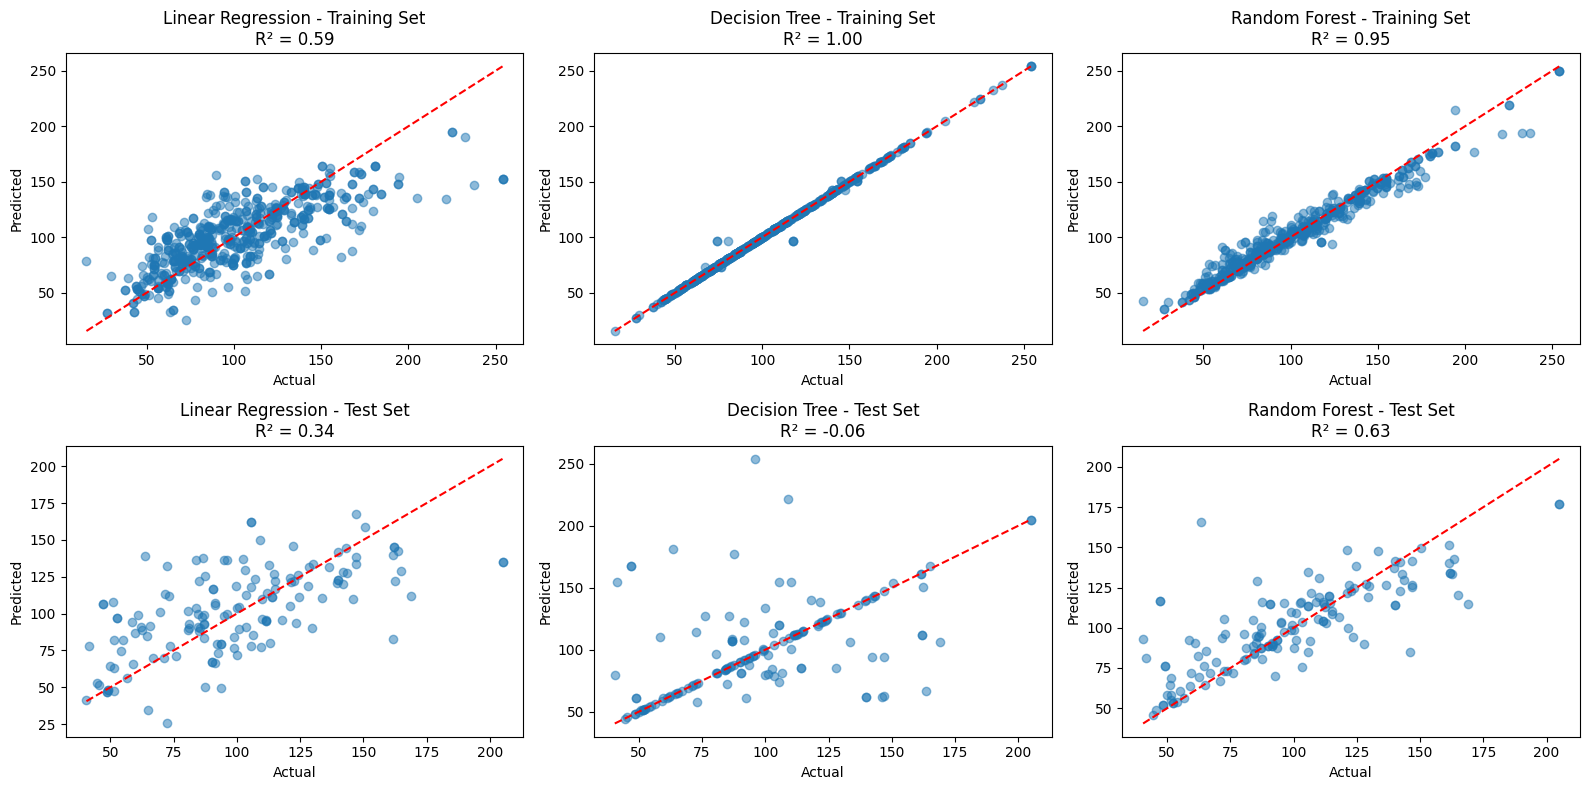

In [40]:
# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=1)

# Prepare the figure for plotting
plt.figure(figsize=(16, 8))

mse_scores = []
r2_test_scores = []
r2_train_scores = []

for i, (name, model) in enumerate(models.items(), 1):
    # Cross-validation loop
    for train_index, test_index in kf.split(X):
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train_cv, y_train_cv)
        y_pred_test = model.predict(X_test_cv)
        y_pred_train = model.predict(X_train_cv)

        mse = mean_squared_error(y_test_cv, y_pred_test)
        r2_test = r2_score(y_test_cv, y_pred_test)
        r2_train = r2_score(y_train_cv, y_pred_train)

        mse_scores.append(mse)
        r2_test_scores.append(r2_test)
        r2_train_scores.append(r2_train)

    
    # Plotting actual vs predicted values for training set
    plt.subplot(2, len(models), i)
    plt.scatter(y_train_cv, y_pred_train, alpha=0.5)
    plt.plot([min(y_train_cv), max(y_train_cv)], [min(y_train_cv), max(y_train_cv)], '--r')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name} - Training Set\nR² = {r2_train:.2f}')

    # Plotting actual vs predicted values for test set
    plt.subplot(2, len(models), i + len(models))
    plt.scatter(y_test_cv, y_pred_test, alpha=0.5)
    plt.plot([min(y_test_cv), max(y_test_cv)], [min(y_test_cv), max(y_test_cv)], '--r')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name} - Test Set\nR² = {r2_test:.2f}')

    

plt.tight_layout()
plt.savefig('model_performance.png')
plt.show()
